In [1]:
import numpy as np
import pandas as pd

Project Goal:
Build an optimized model that can predict Total Sales for cannabis brands and see how close it is to actual data! Then, the company can use this model and predict out to future months sales for specific brands

# Data Cleaning and Choosing Brands to Predict

In [2]:
retail = pd.read_csv (r'C:\Users\joshu\OneDrive\Desktop\UCLA\CS 148\Project3\data\BrandAverageRetailPrice.csv')
details = pd.read_csv (r'C:\Users\joshu\OneDrive\Desktop\UCLA\CS 148\Project3\data\BrandDetails.csv')
sales = pd.read_csv (r'C:\Users\joshu\OneDrive\Desktop\UCLA\CS 148\Project3\data\BrandTotalSales.csv')
units = pd.read_csv (r'C:\Users\joshu\OneDrive\Desktop\UCLA\CS 148\Project3\data\BrandTotalUnits.csv')

First step is to determine which brands we want to predict. We will search through each dataset and find a number of common brands that contain the highest amount of sales

In [3]:
retail.head(5)
retail["Brands"].value_counts()

Moxie Seeds & Extracts    37
Bird Valley Organics      37
La Vida Verde             37
Shake                     37
Jetty Extracts            37
                          ..
Zanna                      1
Luxley                     1
Perfect Blends             1
Life Flower                1
Slimmies                   1
Name: Brands, Length: 1627, dtype: int64

In [178]:
retail[retail["Brands"] == "Cookies"].value_counts()

Brands   Months   ARP        vs. Prior Period
Cookies  12/2020  16.096451  -0.055711           1
         12/2019  14.202881  -0.273516           1
         06/2019  11.727643   0.160372           1
         05/2021  13.857482  -0.115457           1
         05/2020  13.108585  -0.003446           1
         05/2019  10.106792  -0.156446           1
         04/2021  15.666267   0.013479           1
         04/2020  13.153911  -0.156787           1
         04/2019  11.981205   0.121587           1
         03/2021  15.457907   0.176189           1
         03/2020  15.599740   0.110126           1
         03/2019  10.682372   0.185196           1
         02/2021  13.142369  -0.008657           1
         02/2020  14.052230   0.350464           1
         02/2019  9.013167   -0.237835           1
         01/2021  13.257140  -0.176394           1
         01/2020  10.405479  -0.267368           1
         06/2020  12.453776  -0.049953           1
         06/2021  14.692709   0.0602

In [4]:
details = details.rename (columns = {"Brand": "Brands"})
details.head()

,State,Channel,Category L1,Category L2,Category L3,Category L4,Category L5,Brands,Product Description,Total Sales ($),...,Total THC,Total CBD,Contains CBD,Pax Filter,Strain,Is Flavored,Mood Effect,Generic Vendor,Generic Items,$5 Price Increment
0,California,Licensed,Inhaleables,Flower,Hybrid,NaN,NaN,#BlackSeries,#BlackSeries - Vanilla Frosting - Flower (Gram),"1,103.964857",...,0,0,THC Only,NaN,Vanilla Frosting,NaN,Not Mood Specific,Non-Generic Vendors,Non-Generic Items,$10.00 to $14.99
1,California,Licensed,Inhaleables,Flower,Hybrid,NaN,NaN,#BlackSeries,#BlackSeries - Vanilla Frosting - Flower (Gram),674.645211,...,0,0,THC Only,NaN,Vanilla Frosting,NaN,Not Mood Specific,Non-Generic Vendors,Non-Generic Items,$15.00 to $19.99
2,California,Licensed,Inhaleables,Flower,Sativa Dominant,NaN,NaN,#BlackSeries,#BlackSeries - Blueberry Slushy - Flower (Gram),"2,473.699102",...,0,0,THC Only,NaN,Blueberry Slushy,NaN,Not Mood Specific,Non-Generic Vendors,Non-Generic Items,$15.00 to $19.99
3,California,Licensed,Inhaleables,Flower,Sativa Dominant,NaN,NaN,#BlackSeries,#BlackSeries - Blueberry Slushy - Flower (Gram),"14,589.916417",...,0,0,THC Only,NaN,Blueberry Slushy,NaN,Not Mood Specific,Non-Generic Vendors,Non-Generic Items,$10.00 to $14.99
4,California,Licensed,Inhaleables,Concentrates,Dabbable Concentrates,Wax,NaN,101 Cannabis Co.,101 Cannabis Co. - Afghan Kush - Wax,145.39627,...,0,0,THC Only,NaN,Afghan Kush,NaN,Not Mood Specific,Non-Generic Vendors,Non-Generic Items,$35.00 to $39.99


In [13]:
unitsP = units.drop(columns = ["vs. Prior Period"])
    #dropped vs. Prior Period

unitsP['Total Units'] = unitsP['Total Units'].str.replace(',','')

unitsP["Total Units"] = pd.to_numeric(unitsP["Total Units"], errors = "coerce")
unitsP

,Brands,Months,Total Units
0,#BlackSeries,08/2020,1616.339004
1,#BlackSeries,09/2020,NaN
2,#BlackSeries,01/2021,715.532838
3,#BlackSeries,02/2021,766.669135
4,#BlackSeries,03/2021,NaN
...,...,...,...
27681,Zuma Topicals,08/2019,312.515336
27682,Zuma Topicals,09/2019,464.306316
27683,Zuma Topicals,10/2019,348.057905
27684,Zuma Topicals,11/2019,135.922080


In [14]:
#data cleaning
sales = sales.rename (columns = {"Brand": "Brands"})
    #rename columns to Brands to match other datasets

sales['Total Sales ($)'] = sales['Total Sales ($)'].str.replace(',','')
    #issue: dealing with commas in strings when converting to float/int
    
sales['Total Sales ($)'] = pd.to_numeric(sales["Total Sales ($)"], errors = "coerce")
    #converting object to float
sales.head()

,Months,Brands,Total Sales ($)
0,09/2018,10x Infused,1711.334232
1,09/2018,1964 Supply Co.,25475.215945
2,09/2018,3 Bros Grow,120153.644757
3,09/2018,3 Leaf,6063.529785
4,09/2018,350 Fire,631510.048155


In [15]:
sales.groupby(["Brands"]).sum().reset_index().sort_values(["Total Sales ($)"], ascending = False).head(26)

,Brands,Total Sales ($)
503,Flower,1.133928e+09
1188,Raw Garden,4.988029e+08
1374,Stiiizy,3.302618e+08
1287,Select Oil,3.238276e+08
821,Kiva Confections,2.603352e+08
31,Absolute Xtracts,2.137704e+08
628,Heavy Hitters,1.987972e+08
1136,Pre Rolled,1.733669e+08
1605,Wyld,1.510294e+08
1401,Sunderstorm,1.379469e+08


Out of the 26 highest total sales among brands, every one is present across the 4 datasets except Stiizy and Cars by Design (not present in details). We will be continuing our analysis using these brands (all except Stiizy and Cars by Design). The next step is to merge the datasets according to features we determined are relevant to predicting total sales

# Merging data and choosing relevant features 

In [16]:
mergedRU = pd.merge (retail, unitsP, on = ["Brands", "Months"])
mergedRU.info()
     #since prior is inconsistent across datasets, we have removed prior from units and are only using prior from retail

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27211 entries, 0 to 27210
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Brands            27211 non-null  object 
 1   Months            27211 non-null  object 
 2   ARP               25279 non-null  float64
 3   vs. Prior Period  24499 non-null  float64
 4   Total Units       25279 non-null  float64
dtypes: float64(3), object(2)
memory usage: 1.2+ MB


In [17]:
#merging sales and previous merge and subsetting for 10 brands
mergedRUS = pd.merge (mergedRU, sales, on = ["Brands", "Months"])
B = ['Flower',
 'Raw Garden',
 'Select Oil',
 'Kiva Confections',
 'Absolute Xtracts',
 'Heavy Hitters',
 'Pre Rolled',
 'Wyld',
 'Sunderstorm',
 'Papa & Barkley',
 'Pacific Stone',
 'Jetty Extracts',
 'Plus Products',
 'Bloom Farms',
 'Lowell Herb Company',
 'Connected Cannabis Co.',
 'Kings Garden',
 'Kurvana',
 'Canndescent',
 'Flow Kana',
 'Sublime Canna',
 'Concentrate']

mergedB = pd.DataFrame().reindex_like(mergedRUS)
for brand in B:
    mergedB = mergedB.append(mergedRUS[mergedRUS.Brands == brand])
mergedB.dropna(how = "all", inplace = True)
    #use isin command
mergedB["Inhaleables"] = 0
mergedB["Concentrates"] = 0
mergedB["Vape"] = 0
mergedB["Is Flavored"] = 0
mergedB["Edibles"] = 0
mergedB

,Brands,Months,ARP,vs. Prior Period,Total Units,Total Sales ($),Inhaleables,Concentrates,Vape,Is Flavored,Edibles
7974,Flower,09/2018,8.494095,NaN,4.751949e+06,4.036351e+07,0,0,0,0,0
7975,Flower,10/2018,7.517526,-0.114970,4.981977e+06,3.745214e+07,0,0,0,0,0
7976,Flower,11/2018,6.868407,-0.086347,4.996886e+06,3.432064e+07,0,0,0,0,0
7977,Flower,12/2018,6.939468,0.010346,5.248082e+06,3.641889e+07,0,0,0,0,0
7978,Flower,01/2019,7.320434,0.054899,4.582980e+06,3.354941e+07,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
4652,Concentrate,05/2021,26.907236,0.010142,1.297820e+05,3.492074e+06,0,0,0,0,0
4653,Concentrate,06/2021,27.846393,0.034904,1.203450e+05,3.351174e+06,0,0,0,0,0
4654,Concentrate,07/2021,27.631400,-0.007721,1.371931e+05,3.790837e+06,0,0,0,0,0
4655,Concentrate,08/2021,26.284737,-0.048737,1.475043e+05,3.877112e+06,0,0,0,0,0


In [18]:
#Subset details dataset on 10 prechosen brands
B = ['Flower',
 'Raw Garden',
 'Select Oil',
 'Kiva Confections',
 'Absolute Xtracts',
 'Heavy Hitters',
 'Pre Rolled',
 'Wyld',
 'Sunderstorm',
 'Papa & Barkley',
 'Pacific Stone',
 'Jetty Extracts',
 'Plus Products',
 'Bloom Farms',
 'Lowell Herb Company',
 'Connected Cannabis Co.',
 'Kings Garden',
 'Kurvana',
 'Canndescent',
 'Flow Kana',
 'Sublime Canna',
 'Concentrate']

detailsA = pd.DataFrame().reindex_like(details)
for i in B:
    detailsA = detailsA.append(details[details.Brands == i])
detailsA.dropna(how = "all", inplace = True)

Relevant columns from details in relation to total sales:
    Category L1, Category L2, Category L3, Is Flavored

In [20]:
detailsA["Category L2"].value_counts()

Concentrates      22229
Pre-Rolled         2911
Flower             1774
Edibles             925
Sublinguals         527
Topicals             88
Devices              78
Other Cannabis       60
Name: Category L2, dtype: int64

In [21]:
detailsA["Category L3"].value_counts()

Vape                     15194
Dabbable Concentrates     7035
Pre-Rolled                2459
Hybrid                    1205
Candy                      539
Tinctures                  527
Infused Pre-Rolled         452
Indica                     237
Pills                      197
Sativa                     160
Chocolates                 114
Sativa Dominant             71
Vaporizers                  68
Beverages                   62
Bundles/Collections         58
Indica Dominant             56
Balms/Salves                40
Indica Leaning              25
Sativa Leaning              20
Patches                     18
Lotions                     14
Creams                      12
Other Edibles               12
Other                       10
Other Topicals               4
Pet Products                 2
Infused Foods                1
Name: Category L3, dtype: int64

In [22]:
detailsA["Category L1"].value_counts()

Inhaleables        26914
Ingestibles         1452
Topicals              88
All Accessories       78
Other Cannabis        60
Name: Category L1, dtype: int64

In [23]:
detailsA["Is Flavored"].value_counts()

Flavored        635
Not Flavored    290
Name: Is Flavored, dtype: int64

In [25]:
#Including inhaleable, concentrate, vape, edibles, flavor indicator variables within mergedB
for i in B:
    l1 = 0
    l2 = 0
    l3 = 0
    flavor = 0
    edi = 0
    if 'Inhaleables' in detailsA.loc[detailsA["Brands"] == i, "Category L1"].values:
        l1 = 1
    if 'Concentrates' in detailsA.loc[detailsA["Brands"] == i, "Category L2"].values:
        l2 = 1
    if 'Vape' in detailsA.loc[detailsA["Brands"] == i,"Category L3"].values:
        l3 = 1
    if 'Flavored' in detailsA.loc[detailsA["Brands"] == i,"Is Flavored"].values:
        flavor = 1
    if "Edibles" in detailsA.loc[detailsA["Brands"] == i, 'Category L2'].values:
        edi = 1
    mergedB.loc[mergedB["Brands"] == i, "Inhaleables"] = l1
    mergedB.loc[mergedB["Brands"] == i, "Concentrates"] = l2
    mergedB.loc[mergedB["Brands"] == i, "Vape"] = l3
    mergedB.loc[mergedB["Brands"] == i, "Is Flavored"] = flavor
    mergedB.loc[mergedB["Brands"] == i, "Edibles"] = edi

## Augmented Features

Augmented features, scaled variables, imputation strategies

In [27]:
#Augmented Features
mergedB.loc[:,'Previous Month'] = mergedB.loc[:,'Total Sales ($)'].shift(+1)
mergedB.loc[:,'Rolling Average'] = (mergedB.loc[:,'Total Sales ($)'].shift(+1) + mergedB.loc[:,'Total Sales ($)'].shift(+2) + mergedB.loc[:,'Total Sales ($)'].shift(+3))/3

Previous Month and Rolling Average are time series augmented features that are related to our target variable sales. We are choosing this data because we want to have features related to Total Sales

In [28]:
#seeing first values of each brand
brand_groups = mergedB.groupby ("Brands")
first_vals = brand_groups.first().reset_index()
first_vals

,Brands,Months,ARP,vs. Prior Period,Total Units,Total Sales ($),Inhaleables,Concentrates,Vape,Is Flavored,Edibles,Previous Month,Rolling Average
0,Absolute Xtracts,09/2018,27.989502,0.111474,2.053351e+05,5.747228e+06,1,1,1,1,1,1.080112e+07,1.120684e+07
1,Bloom Farms,09/2018,26.249119,-0.146656,1.221845e+05,3.207236e+06,1,1,1,0,0,2.526042e+06,2.923499e+06
2,Canndescent,09/2018,12.586712,-0.178987,1.876904e+05,2.362404e+06,1,0,0,0,0,2.774303e+06,2.803272e+06
3,Concentrate,09/2018,32.822458,0.036285,4.611464e+04,1.513596e+06,1,1,1,0,0,3.073052e+06,3.481472e+06
4,Connected Cannabis Co.,09/2018,11.402041,-0.228373,8.389579e+03,9.565832e+04,1,1,1,0,0,2.569683e+06,2.642457e+06
5,Flow Kana,09/2018,8.614804,-0.046576,5.415944e+05,4.665730e+06,1,0,0,0,0,1.880844e+06,2.146075e+06
6,Flower,09/2018,8.494095,-0.114970,4.751949e+06,4.036351e+07,1,0,0,0,0,4.036351e+07,3.737876e+07
7,Heavy Hitters,09/2018,48.715087,0.025349,1.106624e+05,5.390928e+06,1,1,1,1,1,3.773914e+06,4.177551e+06
8,Jetty Extracts,09/2018,31.991056,0.036414,8.827322e+04,2.823954e+06,1,1,1,0,0,3.791580e+06,4.573046e+06
9,Kings Garden,09/2018,12.557023,-0.134050,5.650188e+04,7.094955e+05,1,1,1,0,0,2.890711e+06,2.978923e+06


In [29]:
#resetting first value of each feature to avoid error
mergedB.loc[mergedB["Months"] == "2018-09-01", "Previous Month"] = 0
mergedB.loc[mergedB["Months"] == "2018-09-01", "Rolling Average"] = 0
mergedB.loc[mergedB["Months"] == "2018-10-01", "Rolling Average"] = 0
mergedB.loc[mergedB["Months"] == "2018-11-01", "Rolling Average"] = 0

In [30]:
#special case Wyld brand that starts with month 03
#subsetting on multiple conditions
mergedB["Previous Month"][(mergedB["Months"] == "2019-03-01") & (mergedB["Brands"] == "Wyld")] = 0
mergedB["Rolling Average"][(mergedB["Months"] == "2019-03-01") & (mergedB["Brands"] == "Wyld")] = 0
mergedB["Rolling Average"][(mergedB["Months"] == "2019-04-01") & (mergedB["Brands"] == "Wyld")] = 0
mergedB["Rolling Average"][(mergedB["Months"] == "2019-05-01") & (mergedB["Brands"] == "Wyld")] = 0

<ipython-input-30-5221e7c334f9>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mergedB["Previous Month"][(mergedB["Months"] == "2019-03-01") & (mergedB["Brands"] == "Wyld")] = 0
<ipython-input-30-5221e7c334f9>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mergedB["Rolling Average"][(mergedB["Months"] == "2019-03-01") & (mergedB["Brands"] == "Wyld")] = 0
<ipython-input-30-5221e7c334f9>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

In [31]:
#Convert months to datetime
mergedB['Months'] = pd.to_datetime(mergedB['Months'])

# Basic Statistics

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

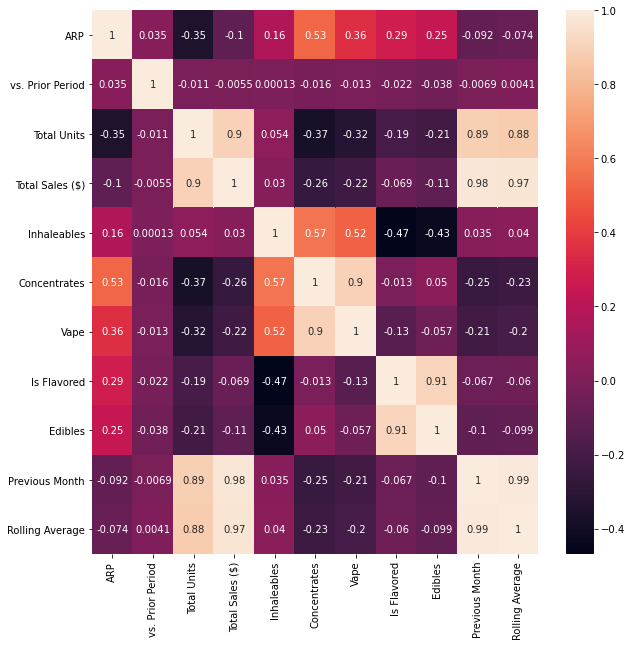

In [33]:
corr = mergedB.corr()
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(corr, annot=True, ax = ax)
plt.show()

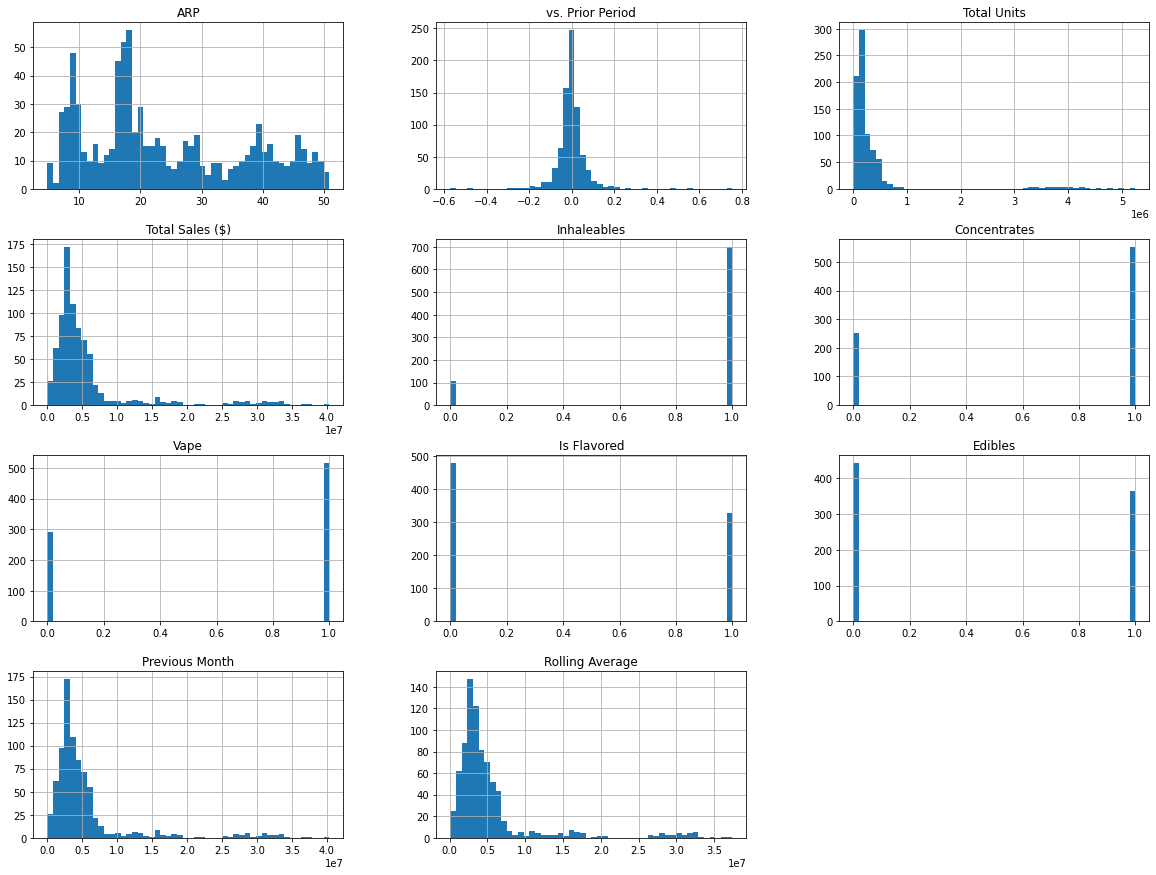

In [34]:
mergedB.hist(bins=50, figsize=(20,15))
plt.show()

In [35]:
#possible graph holding inhealables =1, total sales, and inhal = 0 total sales

# Full Pipeline

In [36]:
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import FeatureUnion
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder

In [37]:
#fix month values
import datetime as dt

mergedB["Month"] = mergedB["Months"].dt.month
mergedB["Year"] = mergedB["Months"].dt.year
mergedB.drop(columns = ["Months"], inplace = True)

In [38]:
#remove total sales response var
mergedB_labels = mergedB["Total Sales ($)"].copy()
mergedB = mergedB.drop("Total Sales ($)", axis=1) #drop Total Sales bc that's what we're predicting on later
mergedB = mergedB.drop("Total Units", axis=1)
    #dropping total units bc it demonstrates collinearity with total sales

In [40]:
#Full Pipeline
imputer = SimpleImputer(strategy="median") # use median imputation for missing values (aka Prior beginning of each brand)

mergedBnum = mergedB.drop(columns = ["Brands", "Year", "Month", "Inhaleables", "Concentrates", "Vape", 
                                     "Is Flavored", "Edibles"],axis=1)
ordinal_features = ["Year", "Month"]
numerical_features = list(mergedBnum)

num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('std_scaler', StandardScaler()),
    ])

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, numerical_features),
        ("ordinal", OrdinalEncoder(), ordinal_features)
    ])

mergedB_prep = full_pipeline.fit_transform(mergedB)

In [41]:
binary_cols = ["Inhaleables", "Concentrates", "Vape", "Is Flavored", "Edibles"]
binary_vals = mergedB[binary_cols]
prepared_df = pd.DataFrame(data=mergedB_prep, columns=numerical_features+ordinal_features)
prepared_df = pd.concat([prepared_df.reset_index(drop=True), binary_vals.reset_index(drop=True)], axis=1)
prepared_df

,ARP,vs. Prior Period,Previous Month,Rolling Average,Year,Month,Inhaleables,Concentrates,Vape,Is Flavored,Edibles
0,-1.208307,-0.018764,-0.307864,-0.309716,0.0,8.0,1,0,0,0,0
1,-1.284385,-1.529110,5.442069,-0.309716,0.0,9.0,1,0,0,0,0
2,-1.334954,-1.145638,4.988055,-0.309716,0.0,10.0,1,0,0,0,0
3,-1.329418,0.149807,4.499711,5.113918,0.0,11.0,1,0,0,0,0
4,-1.299739,0.746695,4.826924,4.903509,1.0,0.0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
801,0.226148,0.147075,-0.312081,-0.423611,3.0,4.0,1,1,1,0,0
802,0.299312,0.478813,-0.307864,-0.357296,3.0,5.0,1,1,1,0,0
803,0.282563,-0.092241,-0.329837,-0.317669,3.0,6.0,1,1,1,0,0
804,0.177653,-0.641750,-0.261273,-0.300290,3.0,7.0,1,1,1,0,0


In [42]:
# dummy encode brands:
dummy_df = pd.get_dummies(mergedB["Brands"])
prepared_df = pd.concat([prepared_df.reset_index(drop=True), dummy_df.reset_index(drop=True)], axis=1)
prepared_df

,ARP,vs. Prior Period,Previous Month,Rolling Average,Year,Month,Inhaleables,Concentrates,Vape,Is Flavored,...,Lowell Herb Company,Pacific Stone,Papa & Barkley,Plus Products,Pre Rolled,Raw Garden,Select Oil,Sublime Canna,Sunderstorm,Wyld
0,-1.208307,-0.018764,-0.307864,-0.309716,0.0,8.0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,-1.284385,-1.529110,5.442069,-0.309716,0.0,9.0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,-1.334954,-1.145638,4.988055,-0.309716,0.0,10.0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,-1.329418,0.149807,4.499711,5.113918,0.0,11.0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,-1.299739,0.746695,4.826924,4.903509,1.0,0.0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
801,0.226148,0.147075,-0.312081,-0.423611,3.0,4.0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
802,0.299312,0.478813,-0.307864,-0.357296,3.0,5.0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
803,0.282563,-0.092241,-0.329837,-0.317669,3.0,6.0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
804,0.177653,-0.641750,-0.261273,-0.300290,3.0,7.0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0


Since we previously cleaned the data, there are barely any null values. We decided to use median imputation. We dummy encoded the categorical brands and split months into years and months for ordinal encoding. We put the data through numerical scaling to help normalize columns like ARP before modeling.

# Linear Regression

In [44]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV

In [159]:
x_train, x_test, y_train, y_test = train_test_split(prepared_df, mergedB_labels, test_size=0.25, random_state=42)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(604, 33)
(202, 33)
(604,)
(202,)


In [167]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso

lasso = Lasso(alpha = 1)
lasso.fit(x_train, y_train)
y_pred = lasso.predict(x_test)

regression_results(y_test, y_pred)

explained_variance:  0.9606
mean_squared_log_error:  0.3928
r2:  0.9606
MAE:  819351.911
MSE:  1641888775165.3308
RMSE:  1281362.0781


C:\Users\joshu\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 288380310001447.25, tolerance: 2471668890062.388
  model = cd_fast.enet_coordinate_descent(


Used lasso regularization because we OHE brands and some of those brand columns wouldn't be used in random iterations of train/test data, therefore their coefficients would be random numbers so we use regularization to drive those coef to 0

In [161]:
819351/mergedB_labels.mean()

0.14989413732537324

This implies an error rate of about 15%

Text(0, 0.5, 'Predicted Sales')

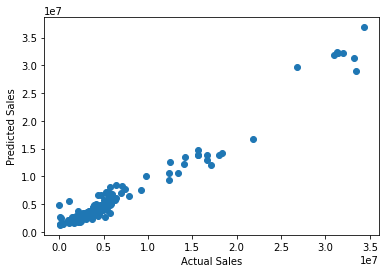

In [53]:
import matplotlib.pyplot as plt
# plot actual vs predicted: 
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")

Text(0, 0.5, 'Residual')

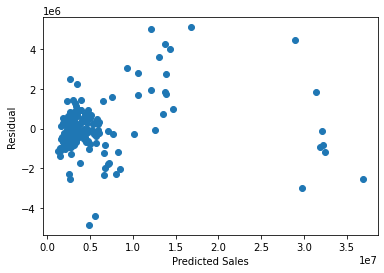

In [54]:
residuals = y_test - y_pred
plt.scatter(y_pred, residuals)
plt.xlabel("Predicted Sales")
plt.ylabel("Residual")

The residual plot shows a faily even distribution around 0, which means our linear model is reliable. The large clustering on the low end of predicted sales makes sense, as we can see in the previous plot that the majority of sales data points fall within a small range.

In [55]:
coefs = pd.Series(lasso.coef_)
cols = pd.Series(prepared_df.columns)
coefs = pd.concat([cols, coefs], axis=1)
coefs.rename(columns={0:"Feature",1:"Coefficient"}, inplace=True)
coefs.sort_values("Coefficient", inplace=True)
coefs

,Feature,Coefficient
13,Canndescent,-3.512514e+06
16,Flow Kana,-3.245782e+06
7,Concentrates,-2.487889e+06
26,Plus Products,-2.260340e+06
27,Pre Rolled,-2.141463e+06
22,Kurvana,-1.696042e+06
14,Concentrate,-1.450442e+06
19,Jetty Extracts,-1.168440e+06
12,Bloom Farms,-1.131630e+06
32,Wyld,-1.062921e+06


Features with large coefficients have a greater influence on the model's predictions than features with small coefficients. We can figure out a feature's importance by looking at the magnitude of its coefficient. From the above table, we can see that the feature with the largest magnitude is the brand Flower. This means the flower brand is the highest correlated to Total sales. After Flower, other other numerical features with large coefficients are Previous Month and ARP. These features also have a large contribution to the regression model.

In [49]:
import sklearn.metrics as metrics
def regression_results(y_true, y_pred):
    # Regression metrics
    explained_variance=metrics.explained_variance_score(y_true, y_pred)
    mean_absolute_error=metrics.mean_absolute_error(y_true, y_pred) 
    mse=metrics.mean_squared_error(y_true, y_pred) 
    mean_squared_log_error=metrics.mean_squared_log_error(y_true, y_pred)
    median_absolute_error=metrics.median_absolute_error(y_true, y_pred)
    r2=metrics.r2_score(y_true, y_pred)
    print('explained_variance: ', round(explained_variance,4))    
    print('mean_squared_log_error: ', round(mean_squared_log_error,4))
    print('r2: ', round(r2,4))
    print('MAE: ', round(mean_absolute_error,4))
    print('MSE: ', round(mse,4))
    print('RMSE: ', round(np.sqrt(mse),4))

# PCA

In [165]:
from sklearn.decomposition import PCA
pca = PCA(0.95) # choose the min number of components s.t. 95% of variance is retained
pca.fit(x_train)

X_train2 = pca.transform(x_train)
X_test2 = pca.transform(x_test)

lin_reg = LinearRegression()
lin_reg.fit(X_train2, y_train)
y_pred = lin_reg.predict(X_test2)

regression_results(y_test, y_pred)

explained_variance:  0.9451
mean_squared_log_error:  0.3609
r2:  0.9448
MAE:  749936.2285
MSE:  2302689109220.638
RMSE:  1517461.4029


In [166]:
749936/mergedB_labels.mean()

0.13719518224697486

Text(0, 0.5, 'Predicted Sales')

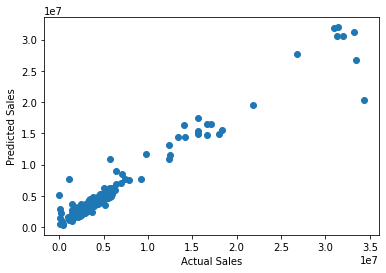

In [58]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")

PCA helps speed up the model and the model's performance increases a little. Here, we run linear regression with principal components that cover 95% of the variance in the data. The MSE is 2,302,689,109,220, which is larger than the MSE we get from running linear regression without PCA. By plotting actual vs predicted sales from this model, we can see that there is a strong correlation for the smaller values, where the majority of the data points lie. However, the fewer large values show less of a correlation, as these are most likely the data points that we are losing by taking only the principal components.

# Ensemble Method

In [171]:
from sklearn.ensemble import AdaBoostRegressor

ada = AdaBoostRegressor(n_estimators=100)
ada.fit(x_train, y_train)
y_pred = ada.predict(x_test)

regression_results(y_test, y_pred)

explained_variance:  0.969
mean_squared_log_error:  0.4569
r2:  0.9632
MAE:  851900.0515
MSE:  1536059590931.458
RMSE:  1239378.7117


In [172]:
851900/mergedB_labels.mean()

0.15584873343351685

This model performed worse than linear regression. It's explained variance is 96%, which means that it covers 96% of the variation in the testing data. The mean average error is lower than the MAE for linear regression.

In [67]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
rf.fit(x_train, y_train)
y_pred = rf.predict(x_test)

regression_results(y_test, y_pred)

explained_variance:  0.973
mean_squared_log_error:  0.2768
r2:  0.9725
MAE:  613858.9481
MSE:  1148970733020.3918
RMSE:  1071900.5238


In [71]:
613858/mergedB_labels.mean()

0.11230072990730341

RF is our best performing model so far. Let's run them through cross validation and optimize hyperparameters to tune the best performing model

# K Fold 

In [72]:
# the data frame is currently ordered by brand and month, which will throw off kfold cross validation
# create a new data frame and shuffle the rows

new_df = pd.concat([prepared_df.reset_index(drop=True), mergedB_labels.reset_index(drop=True)], axis=1)
kfold_test = new_df.sample(frac=1).reset_index(drop=True)
kfold_sales = kfold_test["Total Sales ($)"]
kfold_test.drop(columns="Total Sales ($)", inplace=True)
kfold_test

,ARP,vs. Prior Period,Previous Month,Rolling Average,Year,Month,Inhaleables,Concentrates,Vape,Is Flavored,...,Lowell Herb Company,Pacific Stone,Papa & Barkley,Plus Products,Pre Rolled,Raw Garden,Select Oil,Sublime Canna,Sunderstorm,Wyld
0,-0.679677,-0.947840,-0.337248,-0.231365,2.0,10.0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,1.297938,-0.374043,0.073032,0.029241,2.0,7.0,1,1,1,1,...,0,0,0,0,0,0,1,0,0,0
2,1.472123,-0.072047,-0.488820,-0.463634,3.0,2.0,1,1,0,1,...,0,0,1,0,0,0,0,0,0,0
3,-1.364003,-2.081274,-0.804639,-0.839508,1.0,5.0,1,1,1,0,...,0,1,0,0,0,0,0,0,0,0
4,-0.382211,0.269256,-0.508824,-0.560877,1.0,8.0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
801,1.342365,0.075610,1.234705,1.510742,1.0,2.0,1,1,1,1,...,0,0,0,0,0,0,1,0,0,0
802,1.068379,-0.259034,-0.007836,0.003801,3.0,5.0,1,1,1,1,...,0,0,0,0,0,0,1,0,0,0
803,0.364274,-2.089456,-0.631939,-0.547444,0.0,10.0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
804,-1.086644,-0.434212,-0.379453,-0.384450,1.0,5.0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [141]:
from sklearn.model_selection import KFold

kf = KFold(n_splits=10, random_state=None)
lin_model = LinearRegression()

explained_var = []
MSlog = []
r2 = []
MAE = []
MSE = []
RMSE = []

for train_index, test_index in kf.split(kfold_test):
    X_train, X_test = kfold_test.iloc[train_index, :], kfold_test.iloc[test_index, :]
    y_train2, y_test2 = kfold_sales.iloc[train_index], kfold_sales.iloc[test_index]
    
    lin_model.fit(X_train, y_train2)
    y_pred = lin_model.predict(X_test)
    
    explained_var.append(metrics.explained_variance_score(y_test2, y_pred))
    MSlog.append(metrics.mean_squared_log_error(y_test2, y_pred))
    r2.append(metrics.r2_score(y_test2, y_pred))
    MAE.append(metrics.mean_absolute_error(y_test2, y_pred))
    MSE.append(metrics.mean_squared_error(y_test2, y_pred))
    RMSE.append(np.sqrt(metrics.mean_squared_error(y_test2, y_pred)))
    
print("Average explained variance: ", sum(explained_var)/10)
print("Average mean squared log error: ", sum(MSlog)/10)
print("Average r squared: ", sum(r2)/10)
print("Average mean average error: ", sum(MAE)/10)
print("Average mean squared error: ", sum(MSE)/10)
print("Average root mean square error: ", sum(RMSE)/10)

Average explained variance:  0.9320527752812531
Average mean squared log error:  0.20413791370781284
Average r squared:  0.9314322083788558
Average mean average error:  789582.4827641244
Average mean squared error:  2860616844716.521
Average root mean square error:  1482605.0401777397


In [74]:
789582/mergedB_labels.mean()

0.14444812142493613

In [75]:
kf = KFold(n_splits=10, random_state=None)
ada_model = AdaBoostRegressor(n_estimators=100)

explained_var = []
MSlog = []
r2 = []
MAE = []
MSE = []
RMSE = []

for train_index, test_index in kf.split(kfold_test):
    X_train, X_test = kfold_test.iloc[train_index, :], kfold_test.iloc[test_index, :]
    y_train2, y_test2 = kfold_sales.iloc[train_index], kfold_sales.iloc[test_index]
    
    ada_model.fit(X_train, y_train2)
    y_pred = ada_model.predict(X_test)
    
    explained_var.append(metrics.explained_variance_score(y_test2, y_pred))
    MSlog.append(metrics.mean_squared_log_error(y_test2, y_pred))
    r2.append(metrics.r2_score(y_test2, y_pred))
    MAE.append(metrics.mean_absolute_error(y_test2, y_pred))
    MSE.append(metrics.mean_squared_error(y_test2, y_pred))
    RMSE.append(np.sqrt(metrics.mean_squared_error(y_test2, y_pred)))
    
print("Average explained variance: ", sum(explained_var)/10)
print("Average mean squared log error: ", sum(MSlog)/10)
print("Average r squared: ", sum(r2)/10)
print("Average mean average error: ", sum(MAE)/10)
print("Average mean squared error: ", sum(MSE)/10)
print("Average root mean square error: ", sum(RMSE)/10)

Average explained variance:  0.9268208781184774
Average mean squared log error:  0.2803217900103692
Average r squared:  0.9246840351995435
Average mean average error:  922028.935439663
Average mean squared error:  3484933025010.487
Average root mean square error:  1574771.3036687137


In [76]:
922028/mergedB_labels.mean()

0.1686781265292155

In [1212]:
kf = KFold(n_splits=10, random_state=None)
rf_model = RandomForestRegressor(n_estimators = 1000, random_state = 42)

explained_var = []
MSlog = []
r2 = []
MAE = []
MSE = []
RMSE = []

for train_index, test_index in kf.split(kfold_test):
    X_train, X_test = kfold_test.iloc[train_index, :], kfold_test.iloc[test_index, :]
    y_train2, y_test2 = kfold_sales.iloc[train_index], kfold_sales.iloc[test_index]
    
    rf_model.fit(X_train, y_train2)
    y_pred = rf_model.predict(X_test)
    
    explained_var.append(metrics.explained_variance_score(y_test2, y_pred))
    MSlog.append(metrics.mean_squared_log_error(y_test2, y_pred))
    r2.append(metrics.r2_score(y_test2, y_pred))
    MAE.append(metrics.mean_absolute_error(y_test2, y_pred))
    MSE.append(metrics.mean_squared_error(y_test2, y_pred))
    RMSE.append(np.sqrt(metrics.mean_squared_error(y_test2, y_pred)))
    
print("Average explained variance: ", sum(explained_var)/10)
print("Average mean squared log error: ", sum(MSlog)/10)
print("Average r squared: ", sum(r2)/10)
print("Average mean average error: ", sum(MAE)/10)
print("Average mean squared error: ", sum(MSE)/10)
print("Average root mean square error: ", sum(RMSE)/10)

Average explained variance:  0.94072407219627
Average mean squared log error:  0.133489767275649
Average r squared:  0.9403877430632239
Average mean average error:  622470.2713903986
Average mean squared error:  2954014371074.0835
Average root mean square error:  1302278.130191203


In [77]:
622470/mergedB_labels.mean()

0.11387623089606906

# Grid Search 

In [78]:
from pprint import pprint

In [79]:
#LR hyper tuning not needed
print('Parameters currently in use:\n')
pprint(lin_model.get_params())

Parameters currently in use:

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': False}


In [157]:
#adaboost hyper tuning
print('Parameters currently in use:\n')
print(ada_model.get_params())

Parameters currently in use:

{'base_estimator': None, 'learning_rate': 1.0, 'loss': 'linear', 'n_estimators': 100, 'random_state': None}


In [1213]:
from sklearn.model_selection import GridSearchCV

params = dict()
params["n_estimators"] = [25, 50, 75, 100]
params["learning_rate"] = [0.01, 0.1, 0.5, 1.0]
params["loss"] = ["linear", "square"]

ada_model = AdaBoostRegressor(random_state=0)
cv = KFold(n_splits=10, random_state=None)

search = GridSearchCV(estimator=ada_model, param_grid=params, scoring="neg_mean_absolute_error", cv=cv)
result = search.fit(x_train, y_train)

In [1143]:
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

Best Score: -971036.6403150164
Best Hyperparameters: {'learning_rate': 0.01, 'loss': 'linear', 'n_estimators': 50}


In [156]:
#RF hyperparameter tuning
print('Parameters currently in use:\n')
print(rf.get_params())

Parameters currently in use:

{'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'mse', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 1000, 'n_jobs': None, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}


In [1225]:
params = dict()
params["n_estimators"] = [25, 50, 75, 100]
params["max_features"] = ["auto", 'sqrt']
params["min_samples_split"] = [2, 5, 10]
params["min_samples_leaf"] = [1, 2, 4]

rf_model = RandomForestRegressor(random_state=0)
cv = KFold(n_splits=10, random_state=None)

search = GridSearchCV(estimator=rf_model, param_grid=params, scoring="neg_mean_absolute_error", cv=cv)
result1 = search.fit(x_train, y_train)

In [1226]:
print('Best Score: %s' % result1.best_score_)
print('Best Hyperparameters: %s' % result1.best_params_)

Best Score: -620068.1279074306
Best Hyperparameters: {'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 100}


# Custom Models 

In [143]:
#linreg
kf = KFold(n_splits=10, random_state=None)
lin_model = LinearRegression()

explained_var = []
MSlog = []
r2 = []
MAE = []
MAEtrain = []
MSE = []
RMSE = []

for train_index, test_index in kf.split(kfold_test):
    X_train, X_test = kfold_test.iloc[train_index, :], kfold_test.iloc[test_index, :]
    y_train2, y_test2 = kfold_sales.iloc[train_index], kfold_sales.iloc[test_index]
    
    lin_model.fit(X_train, y_train2)
    y_pred = lin_model.predict(X_test)
    y_pred2 = lin_model.predict (X_train)

    explained_var.append(metrics.explained_variance_score(y_test2, y_pred))
    MSlog.append(metrics.mean_squared_log_error(y_test2, y_pred))
    r2.append(metrics.r2_score(y_test2, y_pred))
    MAE.append(metrics.mean_absolute_error(y_test2, y_pred))
    MAEtrain.append(metrics.mean_absolute_error(y_train2, y_pred2))
    MSE.append(metrics.mean_squared_error(y_test2, y_pred))
    RMSE.append(np.sqrt(metrics.mean_squared_error(y_test2, y_pred)))
    
print("Average explained variance: ", sum(explained_var)/10)
print("Average mean squared log error: ", sum(MSlog)/10)
print("Average r squared: ", sum(r2)/10)
print("Average mean average error test: ", sum(MAE)/10)
print("Average mean average error train: ", sum(MAEtrain)/10)
print("Average mean squared error: ", sum(MSE)/10)
print("Average root mean square error: ", sum(RMSE)/10)

Average explained variance:  0.9320527752812531
Average mean squared log error:  0.20413791370781284
Average r squared:  0.9314322083788558
Average mean average error test:  789582.4827641244
Average mean average error train:  744550.850276929
Average mean squared error:  2860616844716.521
Average root mean square error:  1482605.0401777397


In [164]:
print ("Error Rate lin test:", 789582/mergedB_labels.mean())
lin_kf_e = 789582/mergedB_labels.mean()

Error Rate lin test: 0.14444812142493613


In [135]:
#ADA updated
kf = KFold(n_splits=10, random_state=None)
ada_kf = AdaBoostRegressor(n_estimators=100, learning_rate = 1, loss = "square")

explained_var = []
MSlog = []
r2 = []
MAE = []
MAEtrain = []
MSE = []
RMSE = []

for train_index, test_index in kf.split(kfold_test):
    X_train, X_test = kfold_test.iloc[train_index, :], kfold_test.iloc[test_index, :]
    y_train2, y_test = kfold_sales.iloc[train_index], kfold_sales.iloc[test_index]
    
    ada_kf.fit(X_train, y_train2)
    y_pred = ada_kf.predict(X_test)
    y_pred2 = ada_kf.predict (X_train)
    
    explained_var.append(metrics.explained_variance_score(y_test, y_pred))
    MSlog.append(metrics.mean_squared_log_error(y_test, y_pred))
    r2.append(metrics.r2_score(y_test, y_pred))
    MAE.append(metrics.mean_absolute_error(y_test, y_pred))
    MAEtrain.append(metrics.mean_absolute_error(y_train2, y_pred2))
    MSE.append(metrics.mean_squared_error(y_test, y_pred))
    RMSE.append(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
    
print("Average explained variance: ", sum(explained_var)/10)
print("Average mean squared log error: ", sum(MSlog)/10)
print("Average r squared: ", sum(r2)/10)
print("Average mean average error test: ", sum(MAE)/10)
print("Average mean average error train: ", sum(MAEtrain)/10)
print("Average mean squared error: ", sum(MSE)/10)
print("Average root mean square error: ", sum(RMSE)/10)

Average explained variance:  0.9307109205543312
Average mean squared log error:  0.2274531935735264
Average r squared:  0.925971308452825
Average mean average error test:  904591.5020903734
Average mean average error train:  798548.1304847997
Average mean squared error:  3255643914230.561
Average root mean square error:  1548273.1717247723


In [151]:
print ("Error Rate ADA test:", 919292/mergedB_labels.mean())
ada_e = 919292/mergedB_labels.mean()

Error Rate ADA test: 0.1681775957924223


In [136]:
print ("Error Rate ADA train:", 798548/mergedB_labels.mean())

Error Rate ADA train: 0.14608838406605001


In [131]:
#rf updated
kf = KFold(n_splits=10, random_state=None)
rf_kf = RandomForestRegressor(n_estimators = 100, random_state = 42, max_features = "auto", min_samples_split = 10,
                           min_samples_leaf = 1)

explained_var = []
MSlog = []
r2 = []
MAE = []
MAEtrain = []
MSE = []
RMSE = []

for train_index, test_index in kf.split(kfold_test):
    X_train, X_test = kfold_test.iloc[train_index, :], kfold_test.iloc[test_index, :]
    y_train2, y_test = kfold_sales.iloc[train_index], kfold_sales.iloc[test_index]
    
    rf_kf.fit(X_train, y_train2)
    y_pred = rf_kf.predict(X_test)
    y_pred2 = rf_kf.predict (X_train)
    
    explained_var.append(metrics.explained_variance_score(y_test, y_pred))
    MSlog.append(metrics.mean_squared_log_error(y_test, y_pred))
    r2.append(metrics.r2_score(y_test, y_pred))
    MAE.append(metrics.mean_absolute_error(y_test, y_pred))
    MAEtrain.append(metrics.mean_absolute_error(y_train2, y_pred2))
    MSE.append(metrics.mean_squared_error(y_test, y_pred))
    RMSE.append(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
    
print("Average explained variance: ", sum(explained_var)/10)
print("Average mean squared log error: ", sum(MSlog)/10)
print("Average r squared: ", sum(r2)/10)
print("Average mean average error test: ", sum(MAE)/10)
print("Average mean average error train: ", sum(MAEtrain)/10)
print("Average mean squared error: ", sum(MSE)/10)
print("Average root mean square error: ", sum(RMSE)/10)

Average explained variance:  0.9382567442808003
Average mean squared log error:  0.13169149191533963
Average r squared:  0.9375069983182363
Average mean average error test:  631034.753169569
Average mean average error train:  340724.5915479196
Average mean squared error:  2971240969033.0557
Average root mean square error:  1381738.773368327


In [150]:
print ("Error Rate RF test:", 631034/mergedB_labels.mean())
RF_e = 631034/mergedB_labels.mean()

Error Rate RF test: 0.11544295064383832


In [134]:
print ("Error Rate RF train:", 340724/mergedB_labels.mean())

Error Rate RF train: 0.06233290744265946


Since the error rate on the test set is much higher than the train set, there is probably overfitting on this model.

In [91]:
#SVR
from sklearn.svm import SVR
svm_model = SVR(kernel = 'rbf')
svm_model.fit(x_train, y_train)
y_pred = svm_model.predict(x_test)

regression_results(y_test, y_pred)

explained_variance:  0.0
mean_squared_log_error:  0.974
r2:  -0.0926
MAE:  3204642.4287
MSE:  45575830401968.47
RMSE:  6750987.365


In [87]:
print('Parameters currently in use:\n')
pprint(svm_model.get_params())

Parameters currently in use:

{'C': 1.0,
 'cache_size': 200,
 'coef0': 0.0,
 'degree': 3,
 'epsilon': 0.1,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}


In [97]:
#SVM tuning
params = dict()
params["kernel"] = ["rbf", "linear", "poly", "sigmoid"]
params["gamma"] = ["scale", "auto"]
params["epsilon"] = [.1, .2, .3]

cv = KFold(n_splits=10, random_state=None)

search = GridSearchCV(estimator=svm_model, param_grid=params, scoring="neg_mean_absolute_error", cv=cv)
result = search.fit(x_train, y_train)

print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

Best Score: -3151373.4285291573
Best Hyperparameters: {'epsilon': 0.1, 'gamma': 'scale', 'kernel': 'linear'}


In [145]:
#SVR with kfold and grid search tuning
kf = KFold(n_splits=10, random_state=None)
svm_kf = SVR (kernel = "linear", epsilon = .1, gamma = "scale")

explained_var = []
MSlog = []
r2 = []
MAE = []
MAEtrain = []
MSE = []
RMSE = []

for train_index, test_index in kf.split(kfold_test):
    X_train, X_test = kfold_test.iloc[train_index, :], kfold_test.iloc[test_index, :]
    y_train2, y_test = kfold_sales.iloc[train_index], kfold_sales.iloc[test_index]
    
    svm_kf.fit(X_train, y_train2)
    y_pred = svm_kf.predict(X_test)
    y_pred2 = svm_kf.predict (X_train)

    explained_var.append(metrics.explained_variance_score(y_test, y_pred))
    MSlog.append(metrics.mean_squared_log_error(y_test, y_pred))
    r2.append(metrics.r2_score(y_test, y_pred))
    MAE.append(metrics.mean_absolute_error(y_test, y_pred))
    MAEtrain.append(metrics.mean_absolute_error(y_train2, y_pred2))
    MSE.append(metrics.mean_squared_error(y_test, y_pred))
    RMSE.append(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
    
print("Average explained variance: ", sum(explained_var)/10)
print("Average mean squared log error: ", sum(MSlog)/10)
print("Average r squared: ", sum(r2)/10)
print("Average mean average error test: ", sum(MAE)/10)
print("Average mean average error train: ", sum(MAEtrain)/10)
print("Average mean squared error: ", sum(MSE)/10)
print("Average root mean square error: ", sum(RMSE)/10)

Average explained variance:  0.00020881250462632118
Average mean squared log error:  0.7820095774426379
Average r squared:  -0.09730784272245463
Average mean average error test:  3162091.716879992
Average mean average error train:  3160794.170255298
Average mean squared error:  45028131541140.06
Average root mean square error:  6595168.477924368


In [149]:
print ("Error Rate SVR:", 3162091/mergedB_labels.mean())
SVR_e = 3162091/mergedB_labels.mean()

Error Rate SVR: 0.5784808984053559


In [106]:
#KNN
from sklearn.neighbors import KNeighborsRegressor
knn_model = KNeighborsRegressor(n_neighbors=3)
knn_model.fit(x_train, y_train)
y_pred = knn_model.predict(x_test)

regression_results(y_test, y_pred)

print('Parameters currently in use:\n')
pprint(knn_model.get_params())

explained_variance:  0.9535
mean_squared_log_error:  0.432
r2:  0.9534
MAE:  952633.167
MSE:  1943738005213.358
RMSE:  1394180.0476
Parameters currently in use:

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 3,
 'p': 2,
 'weights': 'uniform'}


In [109]:
#knn tuning
params = dict()
params["n_neighbors"] = [1,3,5,10,50]
params["leaf_size"] = [1,5,10,50]
params["p"] = [1,2]

cv = KFold(n_splits=10, random_state=None)

search = GridSearchCV(estimator=knn_model, param_grid=params, scoring="neg_mean_absolute_error", cv=cv)
result = search.fit(x_train, y_train)

print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

Best Score: -785773.7183616448
Best Hyperparameters: {'leaf_size': 1, 'n_neighbors': 1, 'p': 1}


In [173]:
#knn kfold and grid search
kf = KFold(n_splits=10, random_state=None)
knn_kf = KNeighborsRegressor(n_neighbors=1, p = 1, leaf_size = 1)

explained_var = []
MSlog = []
r2 = []
MAE = []
MAEtrain = []
MSE = []
RMSE = []

for train_index, test_index in kf.split(kfold_test):
    X_train, X_test = kfold_test.iloc[train_index, :], kfold_test.iloc[test_index, :]
    y_train2, y_test = kfold_sales.iloc[train_index], kfold_sales.iloc[test_index]
    
    knn_kf.fit(X_train, y_train2)
    y_pred = knn_kf.predict(X_test)
    y_pred2 = knn_kf.predict (X_train)
    
    explained_var.append(metrics.explained_variance_score(y_test, y_pred))
    MSlog.append(metrics.mean_squared_log_error(y_test, y_pred))
    r2.append(metrics.r2_score(y_test, y_pred))
    MAE.append(metrics.mean_absolute_error(y_test, y_pred))
    MAEtrain.append(metrics.mean_absolute_error(y_train2, y_pred2))
    MSE.append(metrics.mean_squared_error(y_test, y_pred))
    RMSE.append(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
    
print("Average explained variance: ", sum(explained_var)/10)
print("Average mean squared log error: ", sum(MSlog)/10)
print("Average r squared: ", sum(r2)/10)
print("Average mean average error test:", sum(MAE)/10)
print("Average mean average error train:", sum(MAEtest)/10)
print("Average mean squared error: ", sum(MSE)/10)
print("Average root mean square error: ", sum(RMSE)/10)

Average explained variance:  0.9314393942454752
Average mean squared log error:  0.2543966217816285
Average r squared:  0.9305536510660222
Average mean average error test: 755557.7730627613
Average mean average error train: 0.0
Average mean squared error:  3187221009964.8467
Average root mean square error:  1513968.593981149


In [174]:
print ("Error Rate knn:", 755557/mergedB_labels.mean())
knn_e = 755557/mergedB_labels.mean()

Error Rate knn: 0.13822350215615412


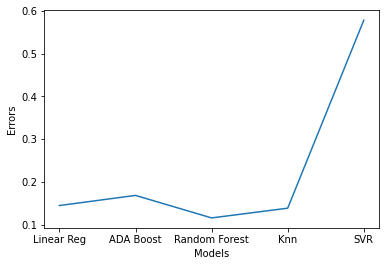

In [155]:
#graph of all error rates of each model
import matplotlib.pyplot as plt
modelsx = ["Linear Reg kf", "Linear Reg", "ADA Boost", "Random Forest", "Knn", "SVR"]
errorsy = [lin_kf_e, ada_e, RF_e, knn_e, SVR_e]

plt.plot(modelsx, errorsy)
plt.xlabel('Models')
plt.ylabel('Errors')
plt.show()

After running each model through a kfold validation and tuning the hyperparameters, the best performing model was the Random Forest, with knn coming in second. However, the RF model was overfitting, so KNN represents our best performing model with about 14% error